<a href="https://colab.research.google.com/github/ceatherheart/titanic_prediction/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program predicts if a passenger will survive on the titanic

In [0]:
#Import Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#Load the data
titanic = sns.load_dataset('titanic')

#Print the first 10 rows of the data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [0]:
#Count the number of rows and columns in the data set
titanic.shape

(891, 15)

In [0]:
#Get some stats
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
#Get a count of the num of survivors 
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

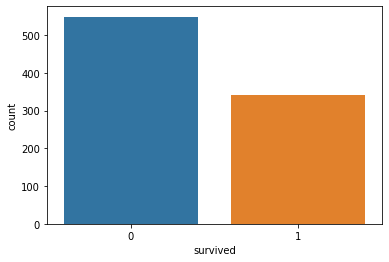

In [0]:
#Visualize the count of survivors 
sns.countplot(titanic['survived'])

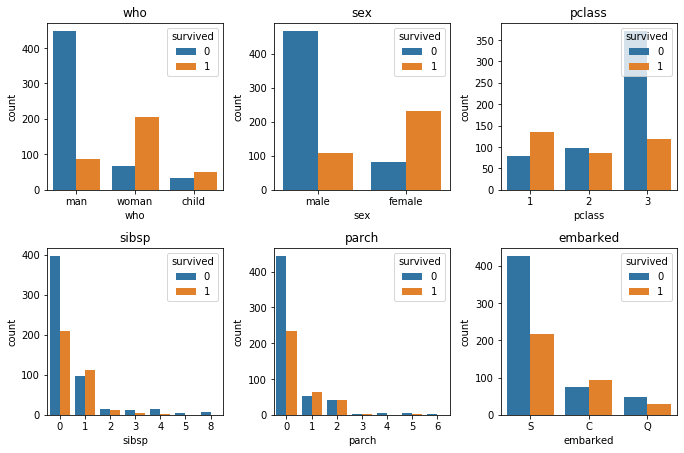

In [0]:
#Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked'

cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

#The subplot grid and firgure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2, n_rows * 3.2))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    #index to go through the number of columns
    i = r*n_cols + c 
    #show where to position each sub plot
    ax = axs[r][c]
    sns.countplot(titanic[cols[i]], hue = titanic['survived'], ax = ax)
    ax.set_title(cols[i])
    ax.legend(title='survived', loc = 'upper right')

plt.tight_layout()

In [0]:
#Look at survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [0]:
#Look at survival rate by sex and class
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


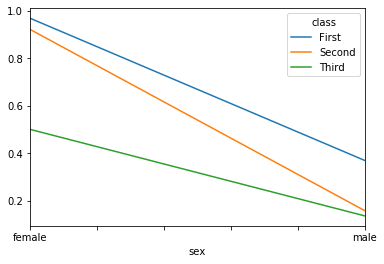

In [0]:
#Look at survival rate by sex and class visually
titanic.pivot_table('survived', index = 'sex', columns = 'class').plot()

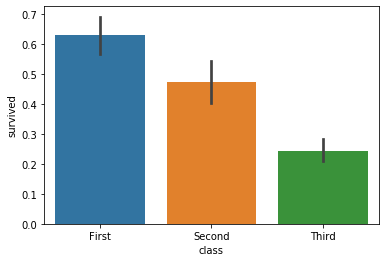

In [0]:
#Plot the survival rate of each class
sns.barplot(x='class', y='survived', data=titanic)

In [0]:
#Look at survival rate by sex, age and class
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

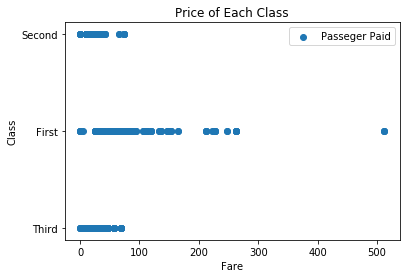

In [0]:
#Plot the prices paid of each class
plt.scatter(titanic['fare'], titanic['class'], label = 'Passeger Paid')
plt.ylabel('Class')
plt.xlabel('Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [0]:
#Count the empty calues in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [0]:
#Look at all of the values in each column & get count
for val in titanic:
  print(titanic[val].value_counts())
  print()

In [0]:
#Drop the columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1)

#remove the rows with missing values 
titanic = titanic.dropna(subset=['embarked', 'age'])

In [0]:
#Count the new num of rows and col in data set
titanic.shape

(712, 8)

In [0]:
#Look at the data types 
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [0]:
#Print the unique values in the columns 
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the sex column
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

#Encode the embarkedcolumn
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [0]:
#Print the unique values in the columns 
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [0]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [0]:
#Split the data into indenpdent 'x' and dependent 'y' variables 
x = titanic.iloc[:, 1:8].values
y = titanic.iloc[:, 0].values

In [0]:
#Split the dataset into 80% training and 20% testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [0]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [0]:
#Create a function with many machine learning models
def models(x_train, y_train):

  #Use Logisitc Regression 
  from sklearn.linear_model import LogisticRegression 
  log = LogisticRegression(random_state = 0)
  log.fit(x_train, y_train)

  #Use KNeighbors
  from sklearn.neighbors import KNeighborsClassifier 
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(x_train, y_train)

  #Use SVC (linear kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(x_train, y_train)

  #Use SVC (RBF kernel)
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(x_train, y_train)

  #Use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(x_train, y_train)

  #Use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(x_train, y_train)

  #Use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(x_train, y_train)

  #Print the training accuracy for each model 
  print('[0]Logistic Regression Training Accuracy', log.score(x_train, y_train))
  print('[1]K Neighbors Training Accuracy', knn.score(x_train, y_train))
  print('[2]SVC Linear Training Accuracy', svc_lin.score(x_train, y_train))
  print('[3]SVC RBF Training Accuracy', svc_rbf.score(x_train, y_train))
  print('[4]Gaussian NB Training Accuracy', gauss.score(x_train, y_train))
  print('[5]Decision Tree Training Accuracy', tree.score(x_train, y_train))
  print('[6]Random Forest Training Accuracy', forest.score(x_train, y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [0]:
#Get and train all of the models
model = models(x_train, y_train)

[0]Logistic Regression Training Accuracy 0.7978910369068541
[1]K Neighbors Training Accuracy 0.8664323374340949
[2]SVC Linear Training Accuracy 0.7768014059753954
[3]SVC RBF Training Accuracy 0.8506151142355008
[4]Gaussian NB Training Accuracy 0.8031634446397188
[5]Decision Tree Training Accuracy 0.9929701230228472
[6]Random Forest Training Accuracy 0.9753954305799648


In [0]:
#Show the confusion matrix and accuracy for all of the models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(x_test))

  #Extract TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()

  test_score = (TP + TN)/ (TP + FP + FN + TN)
  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score) )
  print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



In [0]:
#Get feature importance 
forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


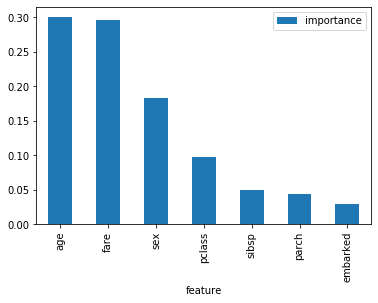

In [0]:
#Visualize the importance 
importances.plot.bar()

In [0]:
#print the prediction of teh random forest classifier 
pred = model[6].predict(x_test)
print(pred)
print()
print(y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [0]:
#My Survival
my_survival = [[1, 0, 20, 1, 1, 400, 0]]

#Scaling my survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

#Pring prediction of my survival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('Died')
else:
  print('Survived')

[0]
Died
